# Homework_2022_03_07

<font color=ff0000> 截止日期 3.31（周四） 23:59</font>

### Exercise 1 Pandas基础练习(4')

In [47]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
data = {
    'age': [24, 53, 23, 24, 33, 42, 57, 57, 36, 29, 53, 39],
    'gender': ['M', 'F', 'M', 'M', 'F', 'M', 'M', 'M', 'M', 'M', 'M', 'F'],
    'occupation': ['technician', 'other', 'writer', 'technician', 'technician', 'executive', 'administrator', 'administrator', 'administrator', 'student', 'lawyer', 'other'],
    'zip_code': ['85711', '94043', '32067', '43537', '15213', '98101', '91344', '91344', '05201', '01002', '90703', '30329']
}

1.1 创建一组从1开始递增的id，作为行索引，由data生成一个DataFrame(1')：

In [48]:
# TODO
df = pd.DataFrame(data, index=np.arange(12))
print(df)

    age gender     occupation zip_code
0    24      M     technician    85711
1    53      F          other    94043
2    23      M         writer    32067
3    24      M     technician    43537
4    33      F     technician    15213
5    42      M      executive    98101
6    57      M  administrator    91344
7    57      M  administrator    91344
8    36      M  administrator    05201
9    29      M        student    01002
10   53      M         lawyer    90703
11   39      F          other    30329


1.2 删除DataFrame中重复的行（保留一行），再删除所有occupation为"other"的行(0.5'):

In [49]:
# TODO
df.drop_duplicates(inplace=True)
df.drop(df[df["occupation"] == "other"].index, inplace=True)
df.reset_index(drop=True, inplace=True)
print(df)

   age gender     occupation zip_code
0   24      M     technician    85711
1   23      M         writer    32067
2   24      M     technician    43537
3   33      F     technician    15213
4   42      M      executive    98101
5   57      M  administrator    91344
6   36      M  administrator    05201
7   29      M        student    01002
8   53      M         lawyer    90703


1.3 以两种方式访问DataFrame的第一行(0.5')：

In [50]:
# TODO
# The first method
print(df.iloc[0])
# The second method
print(df.loc[0])


age                   24
gender                 M
occupation    technician
zip_code           85711
Name: 0, dtype: object
age                   24
gender                 M
occupation    technician
zip_code           85711
Name: 0, dtype: object


1.4 以两种方式访问DataFrame的"occupation"列(0.5')：

In [51]:
# TODO
# The first method
print(df["occupation"])
# The second method
print(df.iloc[:, 2])

0       technician
1           writer
2       technician
3       technician
4        executive
5    administrator
6    administrator
7          student
8           lawyer
Name: occupation, dtype: object
0       technician
1           writer
2       technician
3       technician
4        executive
5    administrator
6    administrator
7          student
8           lawyer
Name: occupation, dtype: object


1.5 打印出DataFrame中出现次数最多的职业名称(0.5')：

In [52]:
# TODO
print(df.occupation.value_counts().idxmax())

technician


1.6 将data_2转换成DataFrame，与上一个DataFrame按照"zip_code"这一列合并，按两种合并方式：

1.合并后结果保留两个DataFrame的并集(0.5')；
2.合并后只保留data_2的所有数据(0.5')。

In [53]:
data_2 = {
    'zip_code': ['85711', '94043', '15213', '98101', '30329'],
    'name': ['Alan', 'Alice', 'Abigail', 'Bob', 'Dave']
}
df2 = pd.DataFrame(data_2)
print(df)
# TODO
df_outer = df.join(df2.set_index("zip_code"), on="zip_code", how="outer")
print(df_outer)
df_right = df.join(df2.set_index("zip_code"), on="zip_code", how="right")
print(df_right)


   age gender     occupation zip_code
0   24      M     technician    85711
1   23      M         writer    32067
2   24      M     technician    43537
3   33      F     technician    15213
4   42      M      executive    98101
5   57      M  administrator    91344
6   36      M  administrator    05201
7   29      M        student    01002
8   53      M         lawyer    90703
      age gender     occupation zip_code     name
0.0  24.0      M     technician    85711     Alan
1.0  23.0      M         writer    32067      NaN
2.0  24.0      M     technician    43537      NaN
3.0  33.0      F     technician    15213  Abigail
4.0  42.0      M      executive    98101      Bob
5.0  57.0      M  administrator    91344      NaN
6.0  36.0      M  administrator    05201      NaN
7.0  29.0      M        student    01002      NaN
8.0  53.0      M         lawyer    90703      NaN
NaN   NaN    NaN            NaN    94043    Alice
NaN   NaN    NaN            NaN    30329     Dave
      age gender  oc

### Exercise 2 Pandas数据分析(6')

本部分数据基于2022年3月的COVID-19疫情数据进行数据分析。

在此致谢数据来源：https://github.com/BlankerL/DXY-COVID-19-Data ，并祝愿疫情的影响早日结束。

2.1 读取COVID-19_March.csv，通过shape和info()查看数据基本信息(0.5')。

In [76]:
import pandas as pd
#TODO
df = pd.read_csv("COVID19_March.csv")
print(df.shape)
print(df.info())

(34021, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34021 entries, 0 to 34020
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   continentName            34021 non-null  object 
 1   continentEnglishName     34021 non-null  object 
 2   countryName              34021 non-null  object 
 3   countryEnglishName       31953 non-null  object 
 4   provinceName             34021 non-null  object 
 5   provinceEnglishName      31953 non-null  object 
 6   province_zipCode         34021 non-null  int64  
 7   province_confirmedCount  34021 non-null  int64  
 8   province_suspectedCount  34021 non-null  int64  
 9   province_curedCount      34021 non-null  int64  
 10  province_deadCount       34021 non-null  int64  
 11  cityName                 16252 non-null  object 
 12  cityEnglishName          15017 non-null  object 
 13  city_zipCode             16252 non-null  float64
 14  city_confi

2.2 从原表格的updateTime中提取最后更新时间，去除具体时间得到日期，并在原DataFrame中增加一列"Date"保存日期(0.5')。

In [77]:
#TODO
updateTime = df.updateTime.tolist()
date = [t.split()[0] for t in updateTime]
df["Date"] = pd.to_datetime(date, yearfirst=True)
df["updateTime"] = pd.to_datetime(df["updateTime"])
print(df.head(5))

  continentName continentEnglishName countryName countryEnglishName  \
0            亚洲                 Asia          中国              China   
1            亚洲                 Asia          中国              China   
2            亚洲                 Asia          中国              China   
3            亚洲                 Asia          中国              China   
4            亚洲                 Asia          中国              China   

  provinceName provinceEnglishName  province_zipCode  province_confirmedCount  \
0          广东省           Guangdong            440000                     6536   
1          广东省           Guangdong            440000                     6536   
2          广东省           Guangdong            440000                     6536   
3          广东省           Guangdong            440000                     6536   
4          广东省           Guangdong            440000                     6536   

   province_suspectedCount  province_curedCount  province_deadCount cityName  \
0     

2.3 这里给出的数据由每天循环爬取得到，因此同一地区同一日的数据可能会有多项纪录，但我们只需保存每一天同一个地区（精确到城市）最后一条记录。请对数据进行筛选，按provinceName, cityName, Date三列为标准去重，并将DataFrame按时间从早到晚的顺序排序(1')。

In [78]:
#TODO
df.sort_values(by="updateTime", inplace=True)
df.drop_duplicates(subset=["provinceName", "cityName", "Date"], keep="last", inplace=True)
df.reset_index(drop=True, inplace=True)

2.4 新建两个DataFrame，分别包含筛选后国内的数据和国外的数据，便于后面分别统计(0.5')。

In [79]:
#TODO
df_in = df[df.countryName == '中国']
df_in.reset_index(drop=True, inplace=True)
df_out = df[df.countryName != '中国']
df_out.reset_index(drop=True, inplace=True)
print(df_in.shape)
print(df_out.shape)

(10264, 20)
(5136, 20)


2.5 对于境外的每一个国家，请用记录中最后一天的病例数(province_confirmed)减去第一天的病例数，再除以之间间隔的天数，以此统计日平均新增情况，并打印全球平均日新增的前十名(1')。

提示：可以使用groupby&apply等方法；请注意，记录的第一天与最后一天未必是3.1和3.27。
参考阅读：https://zhuanlan.zhihu.com/p/101284491

In [81]:
def get_avg_inc(x):
    province_confirmedCount = x.province_confirmedCount.tolist()
    date = list(map(str, x.Date))
    tot_inc = province_confirmedCount[-1] - province_confirmedCount[0]
    interval = int(date[-1].split(' ')[0].split('-')[-1]) - int(date[0].split(' ')[0].split('-')[-1])
    return tot_inc / interval

group_out = df_out.groupby("countryName")
avg_inc = group_out.apply(get_avg_inc)
avg_inc.sort_values(inplace=True, ascending=False)
print(avg_inc[:10])

countryName
韩国     321663.653846
越南     209240.269231
德国     181072.500000
法国      80409.961538
英国      73145.961538
意大利     56343.730769
荷兰      56220.961538
日本      51193.423077
俄罗斯     50667.461538
巴西      39729.807692
dtype: float64


2.6 利用pandas的cut功能对境外的日平均新增情况进行分组，打印每个数量级区间内的国家数(0.5')。

In [84]:
#TODO
bins = [10 ** i for i in range(7)]
bins[0] = 0
avg_inc_cut = pd.cut(avg_inc, bins)
print(pd.value_counts(avg_inc_cut))

(100, 1000]          49
(10, 100]            48
(0, 10]              44
(1000, 10000]        39
(10000, 100000]      24
(100000, 1000000]     3
dtype: int64


2.7 绘制3月以来吉林省每日新增的疫情曲线，以后一日减去前一日的确诊病例之差作为新增标准(提示，差分操作在pandas中也有对应的方法)(1')。

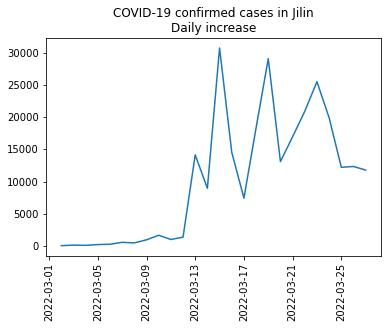

In [152]:
#TODO
from matplotlib.pyplot import MultipleLocator
df_jl = df_in[df_in.provinceEnglishName == 'Jilin']
province_confirmedCount = df_jl.groupby("Date").agg('sum')["province_confirmedCount"]
d_inc = province_confirmedCount.diff()


plt.title('COVID-19 confirmed cases in Jilin\nDaily increase')
plt.xticks(rotation=90)
plt.plot(d_inc.index, list(d_inc))


2.8 请绘制3月以来上海市每日新增的疫情曲线，在一张图上同时画出总新增与本土新增（cityName中有境外输入条目，可以作为区分）(1')。

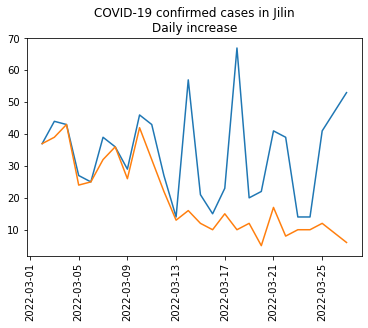

In [223]:
#TODO
def get_local_inc(x):
    x = x[(x.cityName == '境外来沪') | (x.cityName == '境外输入') | (x.cityName == '外地来沪')]
    nonlocal_inc = x["city_confirmedCount"].sum()
    return nonlocal_inc

df_sh = df_in[df_in.provinceEnglishName == 'Shanghai']
tot_inc = df_sh.drop_duplicates(subset='Date')["province_confirmedCount"].diff()
nonlocal_inc = df_sh.groupby('Date').apply(get_local_inc).diff()
plt.title('COVID-19 confirmed cases in Jilin\nDaily increase')
plt.xticks(rotation=90)
plt.plot(nonlocal_inc.index, tot_inc)
plt.plot(nonlocal_inc.index, nonlocal_inc)


### 附加题 聚类方法比较及评价 (+2')
本题我们利用Minst数据集进行KMeans聚类方法的测试，并对聚类的效果进行评估。

In [224]:
from sklearn import datasets, preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, MeanShift
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
X = pd.read_csv('./train_X.csv') # 为了方便起见，这里只采用前6000个MNIST数据
y = pd.read_csv('./train_y.csv')
X, y = np.array(X), np.array(y)
print(X.shape)
print(y.shape)

(6000, 784)
(6000, 1)


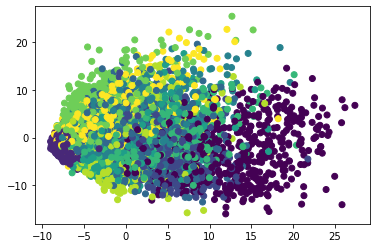

In [238]:
pca2d = PCA(n_components=2)
X_std = preprocessing.scale(X) # 数据标准化
X_2d = pca2d.fit_transform(X_std)# 数据降维至两维便于可视化
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y)

3.1 请在原始的标准化数据X_std和降至二维的数据X_2d上分别进行KMeans聚类，并对两种聚类结果进行可视化（以标签作为颜色，均只在二维可视化即可）和纯度计算（参考PPT第四页的公式）。+1'

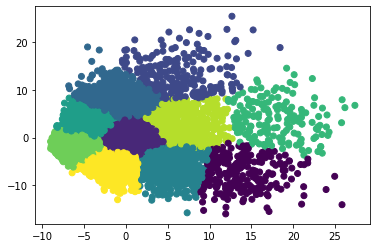

0.3441666666666667


In [245]:
#TODO
from sklearn.metrics import accuracy_score
def purity_score(y_true, y_pred):
    y_voted_labels = np.zeros(y_true.shape)
    labels = np.unique(y_true)
    ordered_labels = np.arange(labels.shape[0])
    for k in range(labels.shape[0]):
        y_true[y_true == labels[k]] = ordered_labels[k]
    labels = np.unique(y_true)
    bins = np.concatenate((labels, [np.max(labels) + 1]), axis=0)

    for cluster in np.unique(y_pred):
        hist, _ = np.histogram(y_true[y_pred == cluster], bins=bins)
        winner = np.argmax(hist)
        y_voted_labels[y_pred == cluster] = winner
    
    return accuracy_score(y_true, y_voted_labels)


y_pred_2d = KMeans(n_clusters=10).fit_predict(X_2d)

plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y_pred_2d)
plt.show()
print(purity_score(y, y_pred_2d))

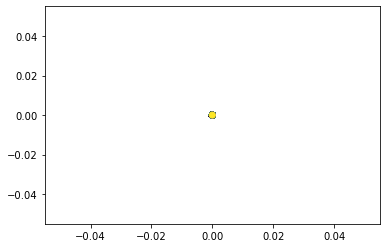

0.5171666666666667


In [248]:
y_pred_std = KMeans(n_clusters=10).fit_predict(X_std)
plt.scatter(X_std[:, 0], X_std[:, 1], c=y_pred_std)
plt.show()
print(purity_score(y, y_pred_std))

3.2 请用KM算法等方式实现聚类结果和原标签的最优匹配，并在此基础上计算两种结果的F值。+1'

参考阅读：

1. 匈牙利算法Wiki https://zh.wikipedia.org/wiki/%E5%8C%88%E7%89%99%E5%88%A9%E7%AE%97%E6%B3%95 
2. KM算法讲解 https://blog.csdn.net/sixdaycoder/article/details/47720471
3. KM算法python实现https://blog.csdn.net/weixin_39504758/article/details/120183504


In [ ]:
#TODO